In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

**Load data set from Github folder**

In [0]:
# load dataset
url = "https://raw.githubusercontent.com/jtianesq/havardsfa/master/all_combined_data_raw.csv"
dataframe = pd.read_csv(url,sep="|",header=0,encoding='windows-1252') #the encoding part is necessary!!!
print(dataframe.head(5))

    Score          Industry                     URLtrim  Year Founded  \
0  Accept  cleaning_service                cleanall.com          1984   
1  Accept  cleaning_service       cleanroomcleaning.com          1993   
2  Accept  cleaning_service            cleantechinc.com          1979   
3  Accept  cleaning_service       concordindustrial.com          2000   
4  Accept  cleaning_service  corporatecleaninggroup.com          2015   

   Recurring Revenue Margins Stable Cash Flow Industry Growth  \
0               7.30     low             high            high   
1               8.40  medium             high          medium   
2               5.60  medium             high          medium   
3               0.16     low           medium          medium   
4               5.70     low           medium          medium   

  Fragmented Industry Straightforward Operations Exogenous Risk  \
0                high                        yes            low   
1                high               

In [0]:
print(dataframe.columns)
print(dataframe.shape)

Index(['Score', 'Industry', 'URLtrim', 'Year Founded', 'Recurring Revenue',
       'Margins', 'Stable Cash Flow', 'Industry Growth', 'Fragmented Industry',
       'Straightforward Operations', 'Exogenous Risk', 'Barriers to Entry',
       'Employee Estimate', 'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration'],
      dtype='object')
(232, 19)


**Print out unique values for each column**

In [0]:
cols = ['Industry','Year Founded','Recurring Revenue', 'Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration']
for col in dataframe[cols].columns.values:
    print(col, dataframe[col].unique())

Industry ['cleaning_service' 'septic_service' 'distributor' 'manufacturer'
 'IT_service' 'medical_equipment' 'medical_service' 'HR_service'
 'investment' 'news_service' 'marketing_service' 'education'
 'construction' 'inspection_testing_services' 'repairement_service'
 'scan_surveying_services']
Year Founded [1984 1993 1979 2000 2015 2010 1971 1998 1994 1991 1940 2014 1999 2016
 2013 2001 2009 2011 1982 1983 1962 1981 1986 2008 1995 1980 1992 1974
 1939 1946 1990 2002 1959 1960 1881 1949 1950 1970 1987 1975 1873 1968
 1972 2006 1977 1969 2005 1966 1954 1928 1997 1965 2003 1956 1988 2004
 1996 1985 1989 1953 1936 1963 1958 1948 1976 1918]
Recurring Revenue [7.3e+00 8.4e+00 5.6e+00 1.6e-01 5.7e+00 6.0e-01 1.3e+00 2.0e+00 1.9e+00
 6.0e+00 3.8e+00 2.6e-01 9.0e-01 1.0e+00 5.0e-02 4.0e-02 3.0e-01 2.2e-01
 5.0e-01 7.4e+00 4.3e+00 4.4e+00 1.2e+01 3.7e+01 2.2e+01 7.0e+00 1.4e+01
 7.9e+00 2.1e+01 5.0e+00 8.0e+00 1.3e+01 1.6e+01 4.2e+01 1.7e+01 3.0e+01
 2.8e+00 1.0e+01 5.1e+01 2.6e+01 4.0e-01 1.5

**Exploring the data **

In [0]:
dataframe['Score'].value_counts()

Reject    179
Accept     53
Name: Score, dtype: int64

In [0]:
#Some records have 'reject' in "Score" column instead of 'Reject'. Fix the inconsistency with the following code.
dataframe['Score']=np.where(dataframe['Score'] =='reject', 'Reject', dataframe['Score'])

#Convert categorical value in "Score" column to numerical values: reject is 0, accept is 1.
dataframe['Score']=np.where(dataframe['Score'] =='Reject', 0, dataframe['Score'])
dataframe['Score']=np.where(dataframe['Score'] =='Accept', 1, dataframe['Score'])
dataframe['Score']=dataframe['Score'].astype(int)
dataframe['Score'].value_counts()

0    179
1     53
Name: Score, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


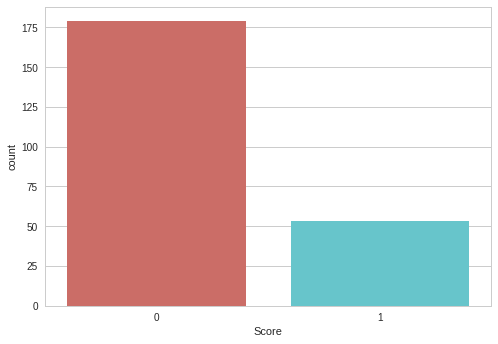

In [0]:
sns.countplot(x='Score',data=dataframe, palette='hls')
plt.show()

The sample is unbalaneced.  As shown in the calculation below, the ratio of reject to accept is 83:16.

In [0]:
count_reject = len(dataframe[dataframe['Score']==0])
count_accept = len(dataframe[dataframe['Score']==1])
pct_of_reject = count_reject/(count_reject + count_accept)
print("percentage of reject is", pct_of_reject*100)
pct_of_accept = count_accept/(count_reject+count_accept)
print("percentage of accept", pct_of_accept*100)

percentage of reject is 77.15517241379311
percentage of accept 22.844827586206897


Most companies in data set were founded between year 2000 and 2018. As a variable, the value is not of normal distribution. Since it reflects what data looks in real life, I chose not to correct the issue.

(array([ 2.,  0.,  0.,  2.,  5., 12., 20., 40., 56., 95.]),
 array([1873. , 1887.3, 1901.6, 1915.9, 1930.2, 1944.5, 1958.8, 1973.1,
        1987.4, 2001.7, 2016. ]),
 <a list of 10 Patch objects>)

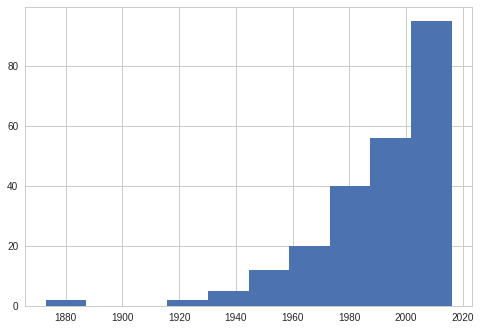

In [0]:
plt.hist(dataframe['Year Founded'])

Most companies in data set had small revenues between 0.5 to 15 million. There are outliners with relatively higher revenue. However, since we did consider and label all the companies during search fund evaluation process, I chose not to remove the outliers. In future, it may make sense to bucketize the revenue using arbitrary categories instead of using real values as did in this study.

(array([143.,  36.,  17.,  14.,   6.,   9.,   3.,   3.,   0.,   1.]),
 array([4.0000e-02, 7.2360e+00, 1.4432e+01, 2.1628e+01, 2.8824e+01,
        3.6020e+01, 4.3216e+01, 5.0412e+01, 5.7608e+01, 6.4804e+01,
        7.2000e+01]),
 <a list of 10 Patch objects>)

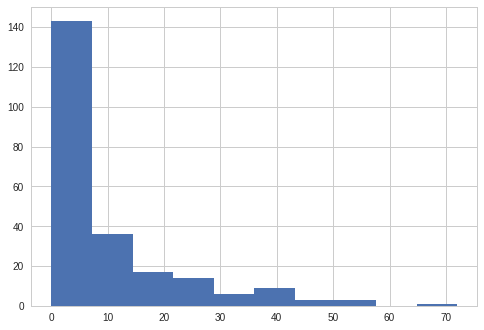

In [0]:
#dataframe=dataframe[dataframe['Recurring Revenue']<=50]
plt.hist(dataframe['Recurring Revenue'])

**Explore categorical variables**

In [0]:
dataframe.groupby('Score').mean()

,Year Founded,Recurring Revenue
Score,,
0,1990.424581,9.839832
1,1991.547170,8.536981


Calculate categorical means for other categorical variables to better understand the distribution of the data

In [0]:
dataframe.groupby('Margins').mean()

,Score,Year Founded,Recurring Revenue
Margins,,,
high,0.500000,1998.500000,17.050000
low,0.207547,1994.245283,4.854623
medium,0.237705,1987.327869,13.368852


In [0]:
dataframe.groupby('Stable Cash Flow').mean()

,Score,Year Founded,Recurring Revenue
Stable Cash Flow,,,
high,0.800000,1991.400000,15.260000
low,0.225166,1993.496689,5.476358
medium,0.197368,1985.039474,17.244211


In [0]:
dataframe.groupby('Industry Growth').mean()

,Score,Year Founded,Recurring Revenue
Industry Growth,,,
high,0.170213,1994.574468,14.021277
low,0.235294,1986.764706,6.690706
medium,0.250000,1992.180000,9.860800


In [0]:
dataframe.groupby('Employee Estimate').mean()

,Score,Year Founded,Recurring Revenue
Employee Estimate,,,
11-50,0.263889,1994.208333,6.864167
2-10,0.250000,1998.950000,1.384500
201-1000,0.090909,1991.181818,16.090909
51-200,0.202247,1982.191011,16.398876


**Convert categorical variables to numerical dummy variables using pandas.get_dummies function.** {sklearn ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html}

In [0]:
cat_vars=['Industry','Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dataframe[var], prefix=var)
    dataframe1=dataframe.join(cat_list)
    dataframe=dataframe1
    
cat_vars=['Industry','Margins', 'Stable Cash Flow',
       'Industry Growth', 'Fragmented Industry', 'Straightforward Operations',
       'Exogenous Risk', 'Barriers to Entry', 'Employee Estimate',
       'Stickiness', 'Supplier Power', 'Customer Power',
       'Service vs Project/Product', 'Longterm Relationships',
       'Customer Concentration', 'URLtrim']
dataframe_vars=dataframe.columns.values.tolist()
to_keep=[i for i in dataframe_vars if i not in cat_vars]
dataframe_final=dataframe[to_keep]
dataframe_final.columns.values
print(dataframe_final.shape)

(232, 60)


Compute pairwise correlation of columns and visualize the correlation using heatmap. {doc ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html}. Three methods available: 
method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

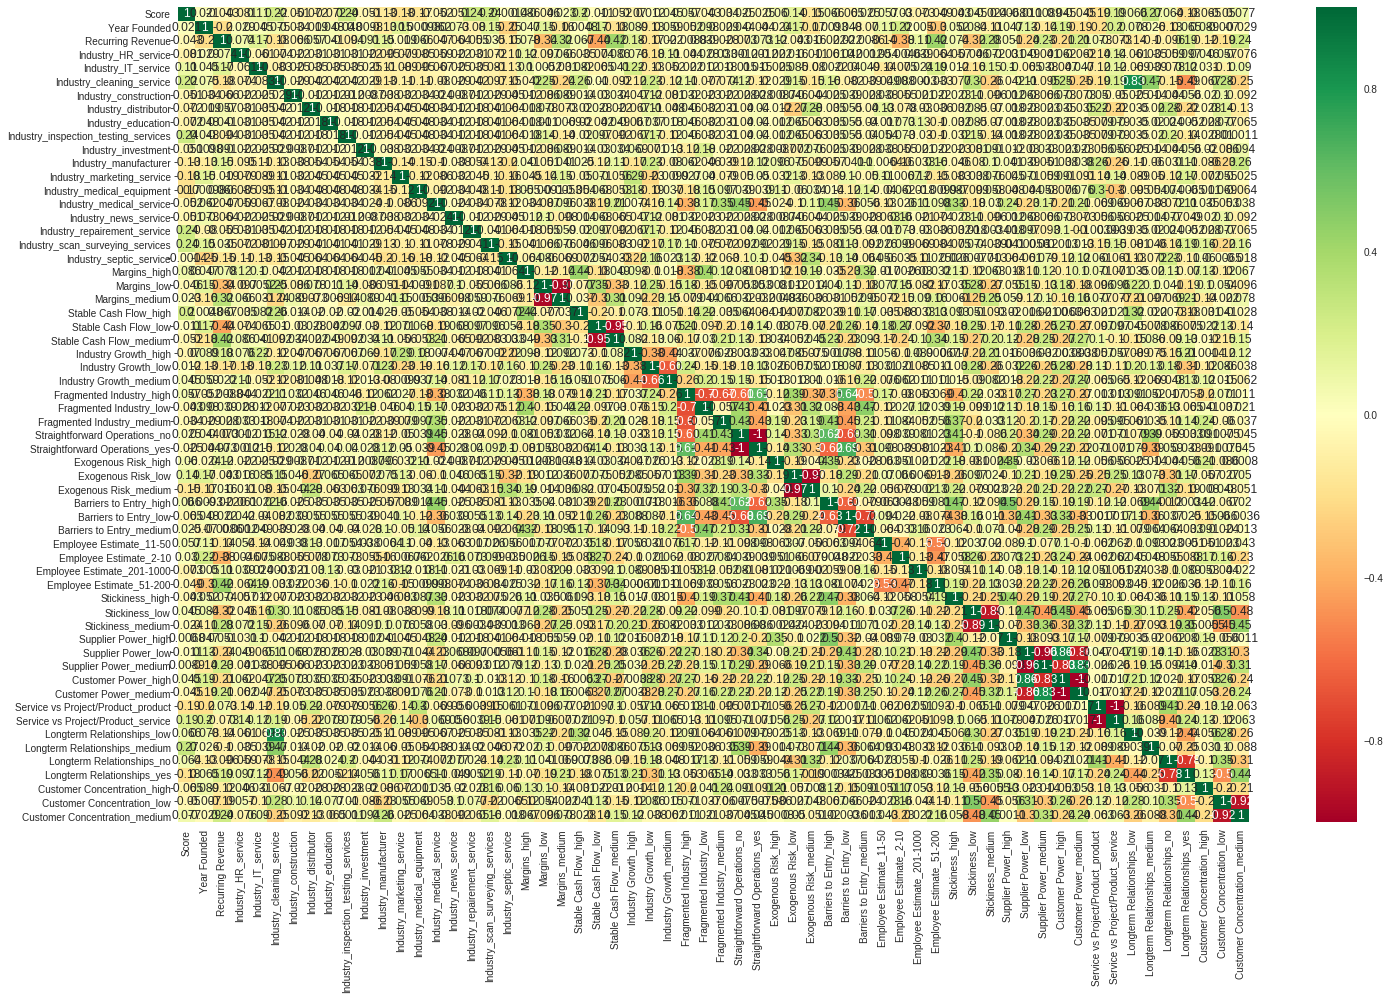

In [0]:
#visualize pairwise correlation
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(24,15))
sns.heatmap(dataframe_final.corr(), annot=True, cmap="RdYlGn")
plt.show()

**Correction of Target Class Imbalance Problem using SMOTE**


In [0]:
X = dataframe_final.loc[:, dataframe_final.columns != 'Score']
y = dataframe_final.loc[:, dataframe_final.columns == 'Score']

In [0]:
!pip install imblearn

In [0]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Score'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of reject in oversampled data",len(os_data_y[os_data_y['Score']==0]))
print("Number of accept data",len(os_data_y[os_data_y['Score']==1]))
print("Proportion of reject data in oversampled data is ",len(os_data_y[os_data_y['Score']==0])/len(os_data_X))
print("Proportion of accept data in oversampled data is ",len(os_data_y[os_data_y['Score']==1])/len(os_data_X))

length of oversampled data is  256
Number of reject in oversampled data 128
Number of accept data 128
Proportion of reject data in oversampled data is  0.5
Proportion of accept data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
data_final_vars=dataframe_final.columns.values.tolist()
y=['Score']
X=[i for i in data_final_vars if i not in y]

print(X)
print(len(X))

['Year Founded', 'Recurring Revenue', 'Industry_HR_service', 'Industry_IT_service', 'Industry_cleaning_service', 'Industry_construction', 'Industry_distributor', 'Industry_education', 'Industry_inspection_testing_services', 'Industry_investment', 'Industry_manufacturer', 'Industry_marketing_service', 'Industry_medical_equipment', 'Industry_medical_service', 'Industry_news_service', 'Industry_repairement_service', 'Industry_scan_surveying_services', 'Industry_septic_service', 'Margins_high', 'Margins_low', 'Margins_medium', 'Stable Cash Flow_high', 'Stable Cash Flow_low', 'Stable Cash Flow_medium', 'Industry Growth_high', 'Industry Growth_low', 'Industry Growth_medium', 'Fragmented Industry_high', 'Fragmented Industry_low', 'Fragmented Industry_medium', 'Straightforward Operations_no', 'Straightforward Operations_yes', 'Exogenous Risk_high', 'Exogenous Risk_low', 'Exogenous Risk_medium', 'Barriers to Entry_high', 'Barriers to Entry_low', 'Barriers to Entry_medium', 'Employee Estimate_11

**Feature ranking with Recursive Feature Elimination (RFE)**

RFE uses an external estimator that assigns weights to features (e.g., the coefficients of a linear model). 
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. 
That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. There are 64 columns of features to begin with. I use RFE to eliminate and keep the 30 features.

{doc ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html}

Two algorithms, "LogisticRegression" and "SVR" (Epsilon-Support Vector Regression) were used as estimators for RFE. The choice of estimator does impact prediction accurarcy as tested using various classifiers - since the algorisms use different mechanism to rank and select features. In general, classifiers performed slightly better overall when SVR estimator was used.

In [0]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 40) #reduce attributes to 40 dimensions
rfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))
print(rfe.support_)
print(rfe.ranking_)

'''
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
rfe = RFE(estimator, 50, step=1)
rfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))
print(rfe.support_)
print(rfe.ranking_)
'''

[False False  True  True  True False  True False  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
 False False False False False False  True  True False  True  True False
 False False  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True]
[20 13  1  1  1  5  1  3  1  1  1  1  1  8  1  1  1  1  6  1  1  1  1  1
  4 15 14 10  7 19  1  1 17  1  1 18  9 16  1  1  1  1 12  1  1  2  1  1
  1  1  1  1  1  1  1  1  1 11  1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

'\nfrom sklearn.svm import SVR\nestimator = SVR(kernel="linear")\nrfe = RFE(estimator, 50, step=1)\nrfe = rfe.fit(os_data_X.astype(float), os_data_y.values.ravel().astype(int))\nprint(rfe.support_)\nprint(rfe.ranking_)\n'

In [0]:
cols = rfe.get_support().tolist() #list of booleans
new_features = [] # The list of K best features

for bool, feature in zip(cols, os_data_X.columns.values):
    if bool:
        new_features.append(feature)
        
X=os_data_X[new_features]
y=os_data_y['Score']

print(os_data_y['Score'].unique())

[0 1]


In [0]:
print(X.columns)

Index(['Industry_HR_service', 'Industry_IT_service',
       'Industry_cleaning_service', 'Industry_distributor',
       'Industry_inspection_testing_services', 'Industry_investment',
       'Industry_manufacturer', 'Industry_marketing_service',
       'Industry_medical_equipment', 'Industry_news_service',
       'Industry_repairement_service', 'Industry_scan_surveying_services',
       'Industry_septic_service', 'Margins_low', 'Margins_medium',
       'Stable Cash Flow_high', 'Stable Cash Flow_low',
       'Stable Cash Flow_medium', 'Straightforward Operations_no',
       'Straightforward Operations_yes', 'Exogenous Risk_low',
       'Exogenous Risk_medium', 'Employee Estimate_11-50',
       'Employee Estimate_2-10', 'Employee Estimate_201-1000',
       'Employee Estimate_51-200', 'Stickiness_low', 'Stickiness_medium',
       'Supplier Power_low', 'Supplier Power_medium', 'Customer Power_high',
       'Customer Power_medium', 'Service vs Project/Product_product',
       'Service vs Pro

**Create a logistic regression model instance**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,  
    intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)
logreg.fit(X_train.astype(float), y_train.astype(int))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


**Compute confusion matrix to evaluate the accuracy of a classification**

In binary classification, the confustion matrix is interpreted as:

C(0,0) - True Negative;
C(0,1) - False Positive (type 1 error);
C(1,0) - False Nagative (type 2 error);
C(1,1) - True Positive;

The result shows the model made 28+34 correct predictions and 6+9 incorrect predictions.

{doc ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html}


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[28  9]
 [ 6 34]]


**Use "classification report" in scikit-learn to get a summary of the precision, recall, F1 score for each class. **

The interpretation of the report can be found at this scikit learn link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

The **precision** is the ratio **tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The **recall** is the ratio **tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The **F-beta score** can be interpreted as a weighted **harmonic mean of the precision and recall**, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The **support** is the **number of occurrences of each class in y_true**.

{doc ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html}

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.79      0.85      0.82        40

   micro avg       0.81      0.81      0.81        77
   macro avg       0.81      0.80      0.80        77
weighted avg       0.81      0.81      0.80        77



**Compute Receiver operating characteristic (ROC)**

Quoting Wikipedia {ref: https://en.wikipedia.org/wiki/Receiver_operating_characteristic}

A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity or recall. 

Y axis = true positive rate
X axis = false positive rate

The dashed line represents a random predictor: it has an AUROC of 0.5. It is commonly used as a baseline to see whether the model is useful.

A good classifier stays as far away from that line as possible towards the upper left corner.

AUC is a different measure from accuracy. It displays trade-offs between true positive rate and false positive rate at all possible threshholds. The shape of curve and the area under the curve (AUC) can be used to visualize how well a model performs. In the situation where you have imbalanced classes, it is often more useful to report AUC for a precision-recall curve. {ref: http://fastml.com/what-you-wanted-to-know-about-auc/}

A good classification model has ROC stay as close as possible towards the upper left corner away from the dotted line in the middle.

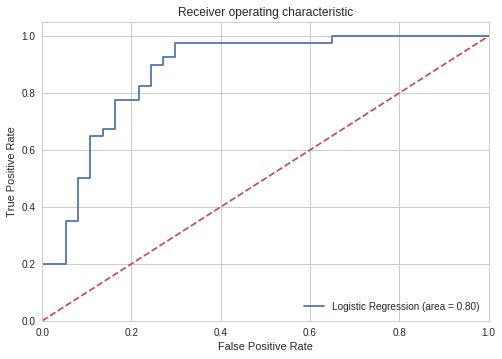

In [0]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Because the sample size is small, I will attemp to add some synthetic features. One technich is to use Mega-Trend Diffusion based on the correlation value between attributes (ref: https://pdfs.semanticscholar.org/f0dd/73d16cf7c28ba552d76432304231d04e6046.pdf)  

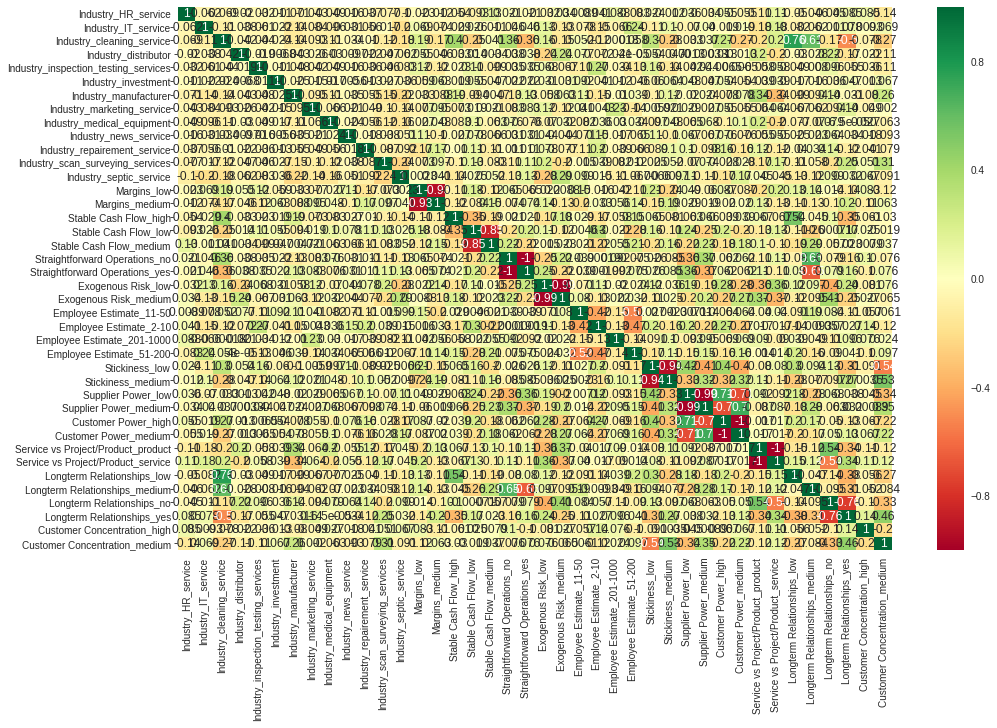

In [0]:
#view attribute correlation
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

plt.subplots(figsize=(16,10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

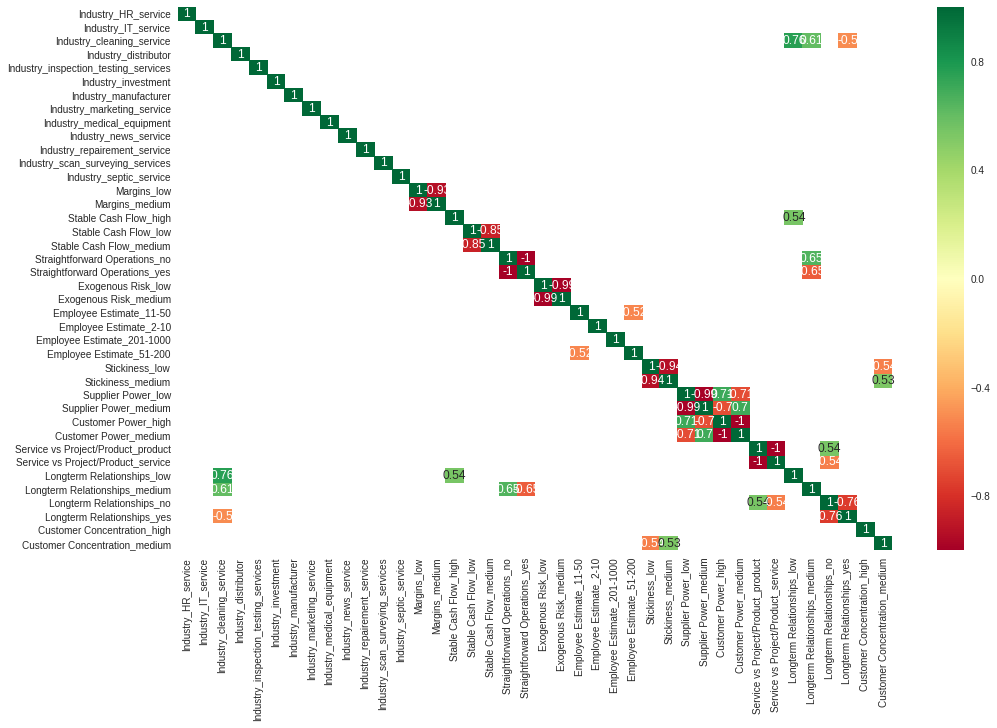

In [0]:
dataCorr = X.corr(method='pearson')
dataCorr = dataCorr[abs(dataCorr)>0.5]
plt.subplots(figsize=(16,10))
sns.heatmap(dataCorr, annot=True, cmap="RdYlGn")
plt.show()

**Applying Dimension Expansion Technique**


A user defined function was created to rank attribute pairs based on correlation scores and identify the pairs having top scores. Synthetic features were created for these pairs using both multiplication and minus operators. The original variables were dropped from the data set while the synthetic features were added. 


In [0]:
#print(X.columns)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr(method='pearson').abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    #au_corr = au_corr[au_corr!=1]
    #Create synthetic features for the top 8 attribute fairs with highest correlation using operator * (multiplication) and - (minus)
    df[au_corr.index[0][0]+'*'+au_corr.index[0][1]] = np.where(( df[au_corr.index[0][0]]* df[au_corr.index[0][1]])>0, 0, 1)
    df[au_corr.index[1][0]+'*'+au_corr.index[1][1]] = np.where(( df[au_corr.index[1][0]]* df[au_corr.index[1][1]])>0, 0, 1)
    df[au_corr.index[2][0]+'*'+au_corr.index[2][1]] = np.where(( df[au_corr.index[2][0]]* df[au_corr.index[2][1]])>0, 0, 1)
    df[au_corr.index[3][0]+'*'+au_corr.index[3][1]] = np.where(( df[au_corr.index[3][0]]* df[au_corr.index[3][1]])>0, 0, 1)
    df[au_corr.index[4][0]+'*'+au_corr.index[4][1]] = np.where(( df[au_corr.index[4][0]]* df[au_corr.index[4][1]])>0, 0, 1)
    df[au_corr.index[5][0]+'*'+au_corr.index[5][1]] = np.where(( df[au_corr.index[5][0]]* df[au_corr.index[5][1]])>0, 0, 1)
    df[au_corr.index[6][0]+'*'+au_corr.index[6][1]] = np.where(( df[au_corr.index[6][0]]* df[au_corr.index[6][1]])>0, 0, 1)
    df[au_corr.index[7][0]+'*'+au_corr.index[7][1]] = np.where(( df[au_corr.index[7][0]]* df[au_corr.index[7][1]])>0, 0, 1)
    #Create synthetic features for the top 8 attribute fairs with highest correlation using operator - (minus)
    df[au_corr.index[0][0]+'-'+au_corr.index[0][1]] = np.where(( df[au_corr.index[0][0]]- df[au_corr.index[0][1]])>0, 0, 1)
    df[au_corr.index[1][0]+'-'+au_corr.index[1][1]] = np.where(( df[au_corr.index[1][0]]- df[au_corr.index[1][1]])>0, 0, 1)
    df[au_corr.index[2][0]+'-'+au_corr.index[2][1]] = np.where(( df[au_corr.index[2][0]]- df[au_corr.index[2][1]])>0, 0, 1)
    df[au_corr.index[3][0]+'-'+au_corr.index[3][1]] = np.where(( df[au_corr.index[3][0]]- df[au_corr.index[3][1]])>0, 0, 1)
    df[au_corr.index[4][0]+'-'+au_corr.index[4][1]] = np.where(( df[au_corr.index[4][0]]- df[au_corr.index[4][1]])>0, 0, 1)
    df[au_corr.index[5][0]+'-'+au_corr.index[5][1]] = np.where(( df[au_corr.index[5][0]]- df[au_corr.index[5][1]])>0, 0, 1)
    df[au_corr.index[6][0]+'-'+au_corr.index[6][1]] = np.where(( df[au_corr.index[6][0]]- df[au_corr.index[6][1]])>0, 0, 1)
    df[au_corr.index[7][0]+'-'+au_corr.index[7][1]] = np.where(( df[au_corr.index[7][0]]- df[au_corr.index[7][1]])>0, 0, 1)
    #drop the top 8 original features with highest correlation
    print(au_corr.index[0][0])
    if au_corr.index[0][0] in df.columns: df.drop(au_corr.index[0][0], axis=1,inplace=True)
    if au_corr.index[1][0] in df.columns: df.drop(au_corr.index[1][0], axis=1,inplace=True)
    if au_corr.index[2][0] in df.columns: df.drop(au_corr.index[2][0], axis=1,inplace=True)
    if au_corr.index[3][0] in df.columns: df.drop(au_corr.index[3][0], axis=1,inplace=True)
    if au_corr.index[4][0] in df.columns: df.drop(au_corr.index[4][0], axis=1,inplace=True)
    if au_corr.index[5][0] in df.columns: df.drop(au_corr.index[5][0], axis=1,inplace=True)
    if au_corr.index[6][0] in df.columns: df.drop(au_corr.index[6][0], axis=1,inplace=True)
    if au_corr.index[7][0] in df.columns: df.drop(au_corr.index[7][0], axis=1,inplace=True)
    if au_corr.index[0][1] in df.columns: df.drop(au_corr.index[0][1], axis=1,inplace=True)
    if au_corr.index[1][1] in df.columns: df.drop(au_corr.index[1][1], axis=1,inplace=True)
    if au_corr.index[2][1] in df.columns: df.drop(au_corr.index[2][1], axis=1,inplace=True)
    if au_corr.index[3][1] in df.columns: df.drop(au_corr.index[3][1], axis=1,inplace=True)
    if au_corr.index[4][1] in df.columns: df.drop(au_corr.index[4][1], axis=1,inplace=True)
    if au_corr.index[5][1] in df.columns: df.drop(au_corr.index[5][1], axis=1,inplace=True)
    if au_corr.index[6][1] in df.columns: df.drop(au_corr.index[6][1], axis=1,inplace=True)
    if au_corr.index[7][1] in df.columns: df.drop(au_corr.index[7][1], axis=1,inplace=True)
    return au_corr[0:n]

#use the print function to view the top correlation pairs
print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 10))

Top Absolute Correlations


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Customer Power_high


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

Customer Power_high                 Customer Power_medium                 1.000000
Straightforward Operations_no       Straightforward Operations_yes        1.000000
Service vs Project/Product_product  Service vs Project/Product_service    1.000000
Supplier Power_low                  Supplier Power_medium                 0.990172
Exogenous Risk_low                  Exogenous Risk_medium                 0.985653
Stickiness_low                      Stickiness_medium                     0.935426
Margins_low                         Margins_medium                        0.931651
Stable Cash Flow_low                Stable Cash Flow_medium               0.854190
Industry_cleaning_service           Longterm Relationships_low            0.764356
Longterm Relationships_no           Longterm Relationships_yes            0.764079
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [0]:
print(X.columns)
print(X.shape)

Index(['Industry_HR_service', 'Industry_IT_service',
       'Industry_cleaning_service', 'Industry_distributor',
       'Industry_inspection_testing_services', 'Industry_investment',
       'Industry_manufacturer', 'Industry_marketing_service',
       'Industry_medical_equipment', 'Industry_news_service',
       'Industry_repairement_service', 'Industry_scan_surveying_services',
       'Industry_septic_service', 'Stable Cash Flow_high',
       'Employee Estimate_11-50', 'Employee Estimate_2-10',
       'Employee Estimate_201-1000', 'Employee Estimate_51-200',
       'Longterm Relationships_low', 'Longterm Relationships_medium',
       'Longterm Relationships_no', 'Longterm Relationships_yes',
       'Customer Concentration_high', 'Customer Concentration_medium',
       'Customer Power_high*Customer Power_medium',
       'Straightforward Operations_no*Straightforward Operations_yes',
       'Service vs Project/Product_product*Service vs Project/Product_service',
       'Supplier Power_l

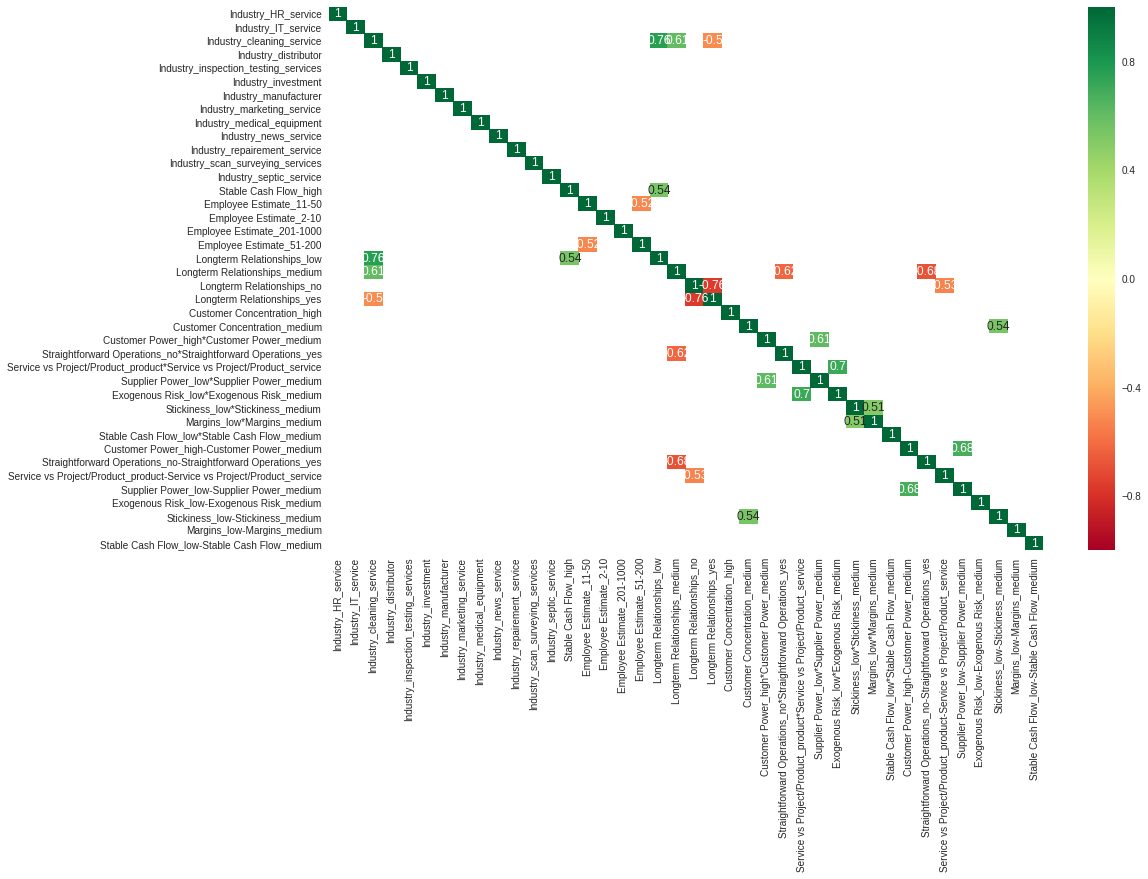

In [0]:
dataCorr = X.corr(method='pearson')
dataCorr = dataCorr[abs(dataCorr)>0.5]
plt.subplots(figsize=(16,10))
sns.heatmap(dataCorr, annot=True, cmap="RdYlGn")
plt.show()

**Recreat the logit model with synthetic features**

The accuracy of the Logit model with synthetic features increased from 0.81 to 0.87.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,  
    intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)
logreg.fit(X_train.astype(float), y_train.astype(int))

y_pred = logreg.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.87
[[37  0]
 [10 30]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        37
           1       1.00      0.75      0.86        40

   micro avg       0.87      0.87      0.87        77
   macro avg       0.89      0.88      0.87        77
weighted avg       0.90      0.87      0.87        77



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


**Draw ROC for new model with synthetic features**

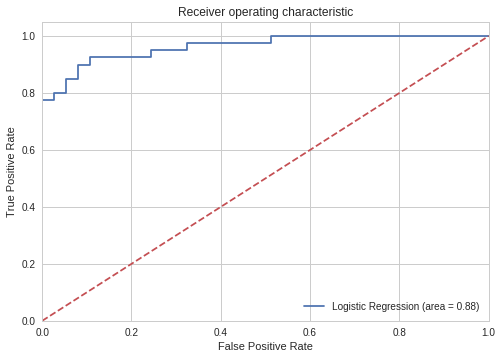

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Apply Principle Component Analysis to reduce feature space dimension after adding synthetic features and get model accuracy again (ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

Use 

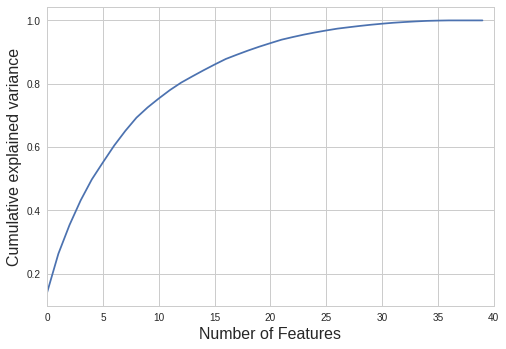

In [0]:
from sklearn.decomposition import PCA

###########################################################################################################################################################
#The Cumulative explained variance shows how much of the variance is captures by the first x features.
#Wth this graph, we can visualize that the first 15 features with the largest correlation already capture more than 90% of the variance.
#If the Regression / Classification model has low accuracy values for your , you could decide to stepwise remove the features with the lowest correlation, 
#(or stepwise add features with the highest correlation).
###########################################################################################################################################################
pca = PCA().fit(X)
var_ratio = pca.explained_variance_ratio_
components = pca.components_
#print(pca.explained_variance_)
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,40,1)
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

Recreate the model using X_pca (with reduced feature space) and calculate classifier accuracy (ref: https://stackoverflow.com/questions/32860849/classification-pca-and-logistic-regression-using-sklearn).

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA(n_components=30)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,  
    intercept_scaling=1, max_iter=20, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)

pipe = Pipeline([('pca', pca), ('logistic', logreg)])
pipe.fit(X_train.astype(float), y_train.astype(int))

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

predictions = pipe.predict(X_test.astype(float))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

original shape:    (256, 40)
transformed shape: (256, 30)
Accuracy of logistic regression classifier on test set: 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Draw ROC for new model using PCA feature extraction

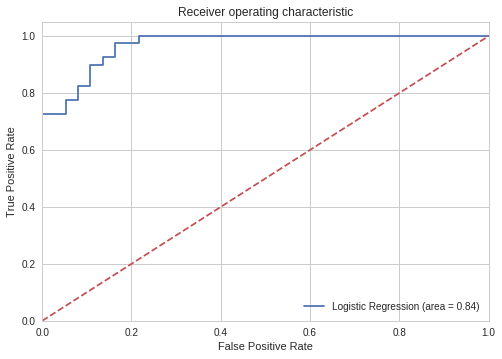

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Run other classfication algorithms with or without treating data set with PCA**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.87


K-Nearest Neighbors, n_neighbors=5

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.88


K-Nearest Neighbors, n_neighbors=10

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.87


Linear Discriminant Analysis

In [0]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.93
Accuracy of LDA classifier on test set: 0.94


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.91
Accuracy of GNB classifier on test set: 0.88


Support Vector Machine

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.83
Accuracy of SVM classifier on test set: 0.79


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of RandomForest classifier on training set: 0.99
Accuracy of RandomForest classifier on test set: 0.88


Gradient Boosting Classifier

In [0]:
!pip install joblib

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from joblib import Parallel, delayed

gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(X_train, y_train)
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of Gradient Boosting classifier on training set: 0.99
Accuracy of Gradient Boosting classifier on test set: 0.91


MLP Neural Net

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha = 1)
mlp.fit(X_train, y_train)
print('Accuracy of MLP classifier on training set: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 0.96
Accuracy of MLP classifier on test set: 0.90


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The KNN model performed the best among algorithms being tested in this study. As shown in the confustion matrix, the model made 36+31 (67) correct predicitons and only 9+1 (10) incorrect predictions for this particular data set.


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[36  1]
 [ 9 31]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.97      0.78      0.86        40

   micro avg       0.87      0.87      0.87        77
   macro avg       0.88      0.87      0.87        77
weighted avg       0.89      0.87      0.87        77



**With this dataset, accuracy is at the highest when k=5.**

([<matplotlib.axis.XTick at 0x7f3283c02cc0>,
 <a list of 5 Text xticklabel objects>)

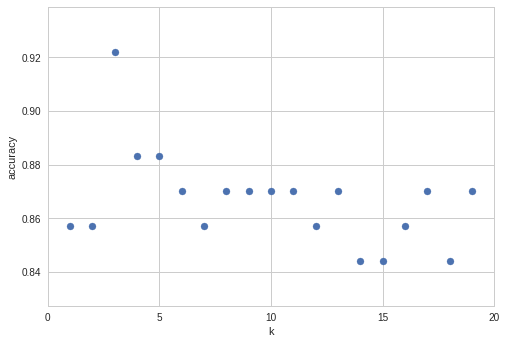

In [0]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Tune hyperparameters for GDB (gradient boosting). The best performance for this data set is 0.83, using the combination of n_estimators = 500, learning_rate=0.01, criterion='frie' for model parameters.

In [0]:
GDB_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'criterion': ['friedman_mse', 'mse', 'mae']
}

for n_est in GDB_params['n_estimators']:
    for lr in GDB_params['learning_rate']:
        for crit in GDB_params['criterion']:
            gbc = GradientBoostingClassifier(n_estimators=n_est, 
                                             learning_rate = lr,
                                             criterion = crit)
            gbc.fit(X_train, y_train)
            train_score = gbc.score(X_train, y_train)
            test_score = gbc.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, lr, crit[:4], train_score, test_score))

For (100, 0.5, frie) - train, test score: 	 0.99441 	-	 0.90909
For (100, 0.5, mse) - train, test score: 	 0.99441 	-	 0.90909
For (100, 0.5, mae) - train, test score: 	 0.89385 	-	 0.87013
For (100, 0.1, frie) - train, test score: 	 0.98883 	-	 0.88312
For (100, 0.1, mse) - train, test score: 	 0.98883 	-	 0.88312
For (100, 0.1, mae) - train, test score: 	 0.89385 	-	 0.87013
For (100, 0.01, frie) - train, test score: 	 0.87151 	-	 0.83117
For (100, 0.01, mse) - train, test score: 	 0.87151 	-	 0.83117
For (100, 0.01, mae) - train, test score: 	 0.84358 	-	 0.79221
For (100, 0.001, frie) - train, test score: 	 0.84358 	-	 0.79221
For (100, 0.001, mse) - train, test score: 	 0.84358 	-	 0.79221
For (100, 0.001, mae) - train, test score: 	 0.84358 	-	 0.79221
For (500, 0.5, frie) - train, test score: 	 0.99441 	-	 0.89610
For (500, 0.5, mse) - train, test score: 	 0.99441 	-	 0.89610
For (500, 0.5, mae) - train, test score: 	 0.89385 	-	 0.87013
For (500, 0.1, frie) - train, test score: